# **Project 3 Report**

Colton Morley

CS458

In [1]:
import os
import numpy as np
import matplotlib
from sklearn.datasets import fetch_20newsgroups
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import NuSVC

## **P3-1. Revisit Text Document Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'].**

In [2]:
cats = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
news_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers', 'footers', 'quotes'))
news_test = fetch_20newsgroups(subset='test', categories=cats,remove=('headers', 'footers', 'quotes'))


**(b)Build classifiers using the following methods:
 Support Vector Machine (sklearn.svm.LinearSVC)
 Naive Bayes classifiers (sklearn.naive_bayes.MultinomialNB)
 K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier)
 Random forest (sklearn.ensemble.RandomForestClassifier)
 AdaBoost classifier (sklearn.ensemble.AdaBoostClassifier)
Optimize the hyperparameters of these methods and compare the results of these methods.**

In [10]:
vectorizer = TfidfVectorizer()
xtrain = vectorizer.fit_transform(news_train.data)
xtest = vectorizer.transform(news_test.data)

ytrain = news_train.target
ytest = news_test.target

#Linear Support Vector Machine

#Potential parameters to use
# multi_class = ['ovr', 'crammer_singer']
# fit_intercept = ['True', 'False']
# for mult in multi_class:
#     for fit in fit_intercept:
#         clf = svm.LinearSVC(multi_class= mult, fit_intercept= fit)
#         clf.fit(xtrain, ytrain)
#         ypred = clf.predict(xtest)
#         cr = classification_report(ytest, ypred)
#         print("For:", clf)
#         print(cr)

clf = svm.LinearSVC(penalty = 'l2', loss = 'squared_hinge',fit_intercept= True,
    multi_class= 'ovr')
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
cr = classification_report(ytest, ypred)
print("********************* LINEAR SVC ********************")
print(cr)

# #Naive Bayes Classifiers
# alpha = [1.0, 1.2, 1.4, .8, .6, .4, .2, 0]
# fit_prior = ['True', 'False']
# for a in alpha: 
#     for fit in fit_prior:
#         clf = MultinomialNB(alpha = a, fit_prior=fit)
#         clf.fit(xtrain, ytrain)
#         ypred = clf.predict(xtest)
#         cr = classification_report(ytest, ypred)
#         print("For:", clf)
#         print(cr)

clf = MultinomialNB(alpha=.2, fit_prior='False')
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
cr = classification_report(ytest, ypred)
print("******************** NAIVE BAYES ********************")
print(cr)

# K Nearest Neighbors
# n_neighbors = [1,2,3,4,5,6,7,8,9,10]
# weights = ['uniform', 'distance']
# algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# p = [1,2]

# for n in n_neighbors:
#     for w in weights:
#         for a in algorithm:
#             for pp in p:
#                 clf = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm = a, p = pp)
#                 clf.fit(xtrain, ytrain)
#                 ypred = clf.predict(xtest)
#                 cr = classification_report(ytest, ypred)
#                 print("For:", clf)
#                 print(cr)

clf = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', algorithm = 'brute')
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
cr = classification_report(ytest, ypred)
print("**************** K NEAREST NEIGHBORS ****************")
print(cr)

# #Random Forest
# criterion = ['gini', 'entropy']
# min_samples_split = [2,3,4,5]
# max_feautures = ['auto', 'sqrt', 'log2']
# for c in criterion:
#     for min_samples in min_samples_split:
#         for max_feat in max_feautures:
#             clf = RandomForestClassifier(criterion = c, min_samples_split = min_samples, max_features = max_feat)
#             clf.fit(xtrain, ytrain)
#             ypred = clf.predict(xtest)
#             cr = classification_report(ytest, ypred)
#             print("For:", c, min_samples, max_feat)
#             print(cr)

clf = RandomForestClassifier(criterion = 'gini', min_samples_split=3, max_features='auto')
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
cr = classification_report(ytest, ypred)
print("******************* RANDOM FOREST *******************")
print(cr)

# #AdaBoost Classifier
# n_estimators = [20, 30, 50, 70, 90]
# learning_rate = [.2, .4, .8, 1, 1.2, 1.5]
# algorithm = ['SAMME', 'SAMME.R']
# print("XXXXXXXXXXXXXXXXXXXXXXXX")
# for n in n_estimators:
#     for l in learning_rate:
#         for a in algorithm:
#             clf = AdaBoostClassifier(n_estimators=n, learning_rate=l, algorithm=a)
#             clf.fit(xtrain, ytrain)
#             ypred = clf.predict(xtest)
#             cr = classification_report(ytest, ypred)
#             print("For:", n, l, a)
#             print(cr)


clf = AdaBoostClassifier(n_estimators=50, learning_rate =.4, algorithm = 'SAMME.R')
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
cr = classification_report(ytest, ypred)
print("********************* ADABOOST **********************")
print(cr)

********************* LINEAR SVC ********************
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       389
           1       0.81      0.91      0.86       396
           2       0.87      0.83      0.85       394
           3       0.90      0.79      0.84       251

    accuracy                           0.87      1430
   macro avg       0.87      0.86      0.86      1430
weighted avg       0.87      0.87      0.87      1430

******************** NAIVE BAYES ********************
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       389
           1       0.80      0.95      0.87       396
           2       0.85      0.87      0.86       394
           3       0.98      0.70      0.82       251

    accuracy                           0.87      1430
   macro avg       0.89      0.86      0.87      1430
weighted avg       0.88      0.87      0.87      1430

**************** K NEA

To optimize the hyperparameters I used a brute force method of nested for loops.  I have used Grid Search in previous projects but have had trouble getting it to produce meaningful results that improve accuracy.  I used the output of these for loops to determine the best parameters and created the classifiers with them.  These loops are commented out for runtime's sake but are still visible to clarify what parameters were optimized. 

The results of these loops are printed above.  The two most accurate were Linear SVC and Naive Bayes, and the least accurate was K nearest neighbors. Random Forest and AdaBoost were in between these, but much closer to the accuracy of Linear SVC and Naive Bayes than K nearest neighbors.

# **P3-2. Recognizing Hand-Written Digits**

**(a and b) Develop a multi-layer perceptron classifier to recognize images of hand-written digits. To build your classifier**

**Optimize the hyperparameters of your neural network to maximize the classification accuracy. Show the confusion matrix of your neural network. Discuss and compare your results
with the results using a support vector classifier**

In [5]:
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

#Optimize parameters the same as previously
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
learning_rate = ['constant', 'invscaling', 'adaptive']

# for a in activation:
#     for s in solver:
#         for l in learning_rate:
#             clf = MLPClassifier(activation=a, solver=s, learning_rate = l)
#             clf.fit(X_train, y_train)
#             ypred = clf.predict(X_test)
#             cr = classification_report(y_test, ypred)
#             print("For:", a,s,l)
#             print(cr)


#MLP CLassifier 
clf = MLPClassifier(activation = 'relu', solver = 'adam', learning_rate = 'adaptive')
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
cr = classification_report(y_test, ypred)
print("************** DEFAULT MLP CLASSIFIER ***************")
print(cr)
cm = confusion_matrix(y_test, ypred)
print("******* CONFUSION MATRIX *******")
print(cm)

************** DEFAULT MLP CLASSIFIER ***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       0.94      0.96      0.95        98
           2       0.99      0.93      0.95        80
           3       0.99      0.97      0.98        93
           4       0.99      0.96      0.97        93
           5       0.94      0.98      0.96        87
           6       0.99      0.98      0.98        85
           7       1.00      0.98      0.99        86
           8       0.91      0.97      0.94        96
           9       0.93      0.96      0.94        89

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

******* CONFUSION MATRIX *******
[[92  0  0  0  0  0  0  0  0  0]
 [ 0 94  1  1  0  0  0  0  2  0]
 [ 0  2 74  0  0  0  0  0  4  0]
 [ 0  0  0 90  0  1  0  0  0  2]
 [ 0  0  0  0 89  0  0

The parameter optimization method used here is the same as the one used in question one, using for loops to determine which combination produced the best accuracy. 

Using optimized parameters, the MLP Classifier results in the same accuracy, macro average, and weighted average as the support vector classifier.  The support vector had more trouble with the number 3 while the MLP had more trouble with the numbers 8 and 9

# **P3-3. Nonlinear Suport Vector Machine**

(a and b) Generate the following 2 class data points. Develop a nonlinear SVM binary classifier (sklearn.svm.NuSVC)

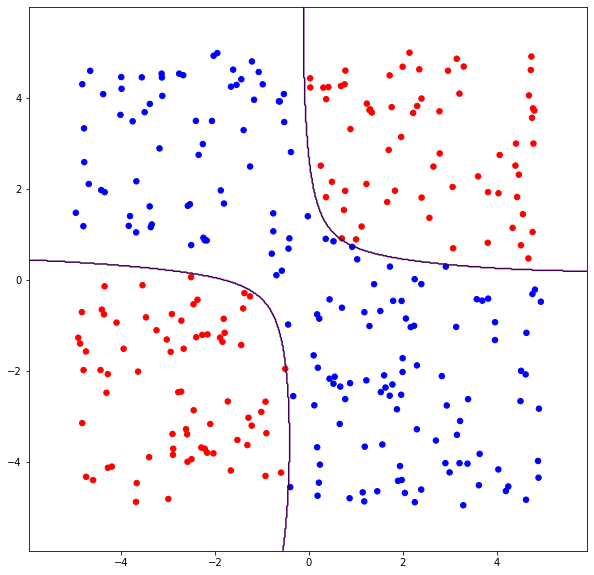

In [13]:
#Genetate points
np.random.seed(0)
X = np.random.rand(300, 2)*10-5
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
#Create nonlinar svm binary calssifier
clf = NuSVC()
clf.fit(X,Y)
ypreds = clf.predict(X)
yint = ypreds.astype(int)


h=.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ['red', 'blue']
markers = ['s', '8']

plt.figure(figsize = (10,10))
contours = plt.contour(xx, yy, Z, levels=[0], linewidth = 1, linestyle = '-', color = 'black')

#plt.scatter(X1[:,0], X1[:,1], s=25, marker = 's', faceolors = 'none', edgecolors = 'r')

plt.scatter(X[:,0], X[:,1], c=yint, s=30, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()


This plot is similar to the plot on slide 131 of chapter 4.  I believe everything is correct besides the fact that lack of knowledge of matplot makes it difficult to coordinate different markers and make the decision boundaries into circles rather than open shapes